# Assignment 13 Naive Bayes. 
## Dataset :- SalaryData_Test
## Classification model using Naive Bayes
### Quick info. about Text mining.
### Info :- 
Naïve Bayes classifiers are a family of probabilistic classifiers based on Bayes Theorem with a strong assumption of independence between the features. These are not only fast and reliable but also simple and easiest classifier which is proving its stability in machine learning world. Despite its simplicity, it gives accurate prediction in text classification problems.
“Naive” i.e not correlated to each other.
Bayes Theorem is a simple mathematical formula used to calculated the conditional probability of for each target label given a data set. Conditional probability measures the probability of an event occurring when another related event is already has occurred.
#### Advantages
This algorithm works quickly and can save a lot of time. 
Naive Bayes is suitable for solving multi-class prediction problems. 
If its assumption of the independence of features holds true, it can perform better than other models and requires much less training data. 
Naive Bayes is better suited for categorical input variables than numerical variables.
#### Disadvantages
Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.
This algorithm faces the ‘zero-frequency problem’ where it assigns zero probability to a categorical variable whose category in the test data set wasn’t available in the training dataset. It would be best if you used a smoothing technique to overcome this issue.
Its estimations can be wrong in some cases, so you shouldn’t take its probability outputs very seriously. 

#### Libraries

In [3]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score,classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
sns.set()

import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [168]:
SalaryData_Test01 = pd.read_csv(r"D:\Data Science Material\Assignments\Naive Bayes\SalaryData_Test.csv",sep=",")

In [169]:
SalaryData_Test01.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


#### Exploring the dataset

In [170]:
# Simple Statistical measures

SalaryData_Test01.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [171]:
#Let's explore about the data types, null columns, dataset length, rows and columns
SalaryData_Test01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [172]:
# Checking data type of each feature
SalaryData_Test01.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

### Data Analysis

In [173]:
SalaryData_Test01.shape  # 15060 rows, 14 in our dataset

(15060, 14)

In [174]:
# chec colsking any null values present in the dataset
SalaryData_Test01.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

there is a no any null values present in the dataset

In [175]:
# checking details of cols
SalaryData_Test01.workclass.value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [176]:
# checking details of cols
SalaryData_Test01.maritalstatus.value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [177]:
# checking details of cols
SalaryData_Test01.occupation.value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [178]:
# checking details of cols
SalaryData_Test01.race.value_counts()

 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64

In [179]:
# checking details of cols
SalaryData_Test01.native.value_counts()

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Dominican-Republic               30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [195]:
# making duplicate copy of original data safe purpose
SalaryData_Test = SalaryData_Test01.copy()

### Data Cleaning

In [196]:
SalaryData_Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


#### Outlier 

In [197]:
def count_plot(df, columns):
    plt.figure(figsize=(35, 8))
    for i,var  in enumerate(columns):
        plt.subplot(1,2,2)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = SalaryData_Test.columns.tolist()
features.remove('Salary')
features

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

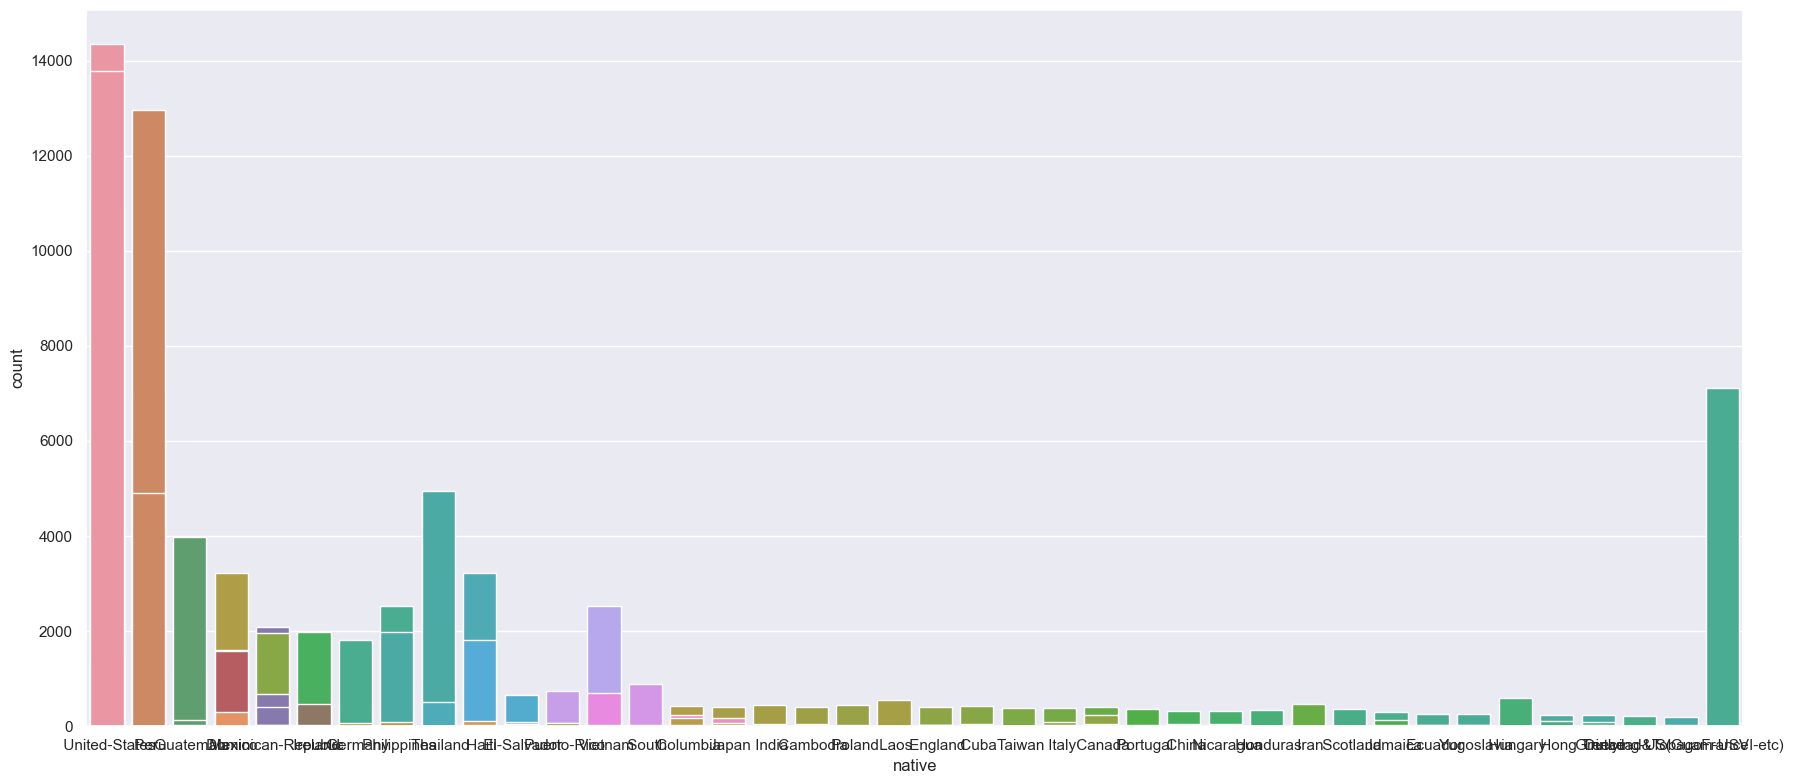

In [198]:
count_plot(SalaryData_Test, features)
plt.show()


In [199]:
# OrdinalEncoder - The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorical (discrete) features. 
# The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(SalaryData_Test[features])
SalaryData_Test_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[ 8.,  2.,  1., ...,  0., 39., 37.],
       [21.,  2., 11., ...,  0., 49., 37.],
       [11.,  1.,  7., ...,  0., 39., 37.],
       ...,
       [21.,  2.,  9., ...,  0., 49., 37.],
       [27.,  2.,  9., ...,  0., 39., 37.],
       [18.,  3.,  9., ...,  0., 59., 37.]])

In [203]:
#LebelEncoder - Encode target labels with value between 0 and n_classes-1. 
# This transformer should be used to encode target values, i.e. y, and not the input X.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(SalaryData_Test['Salary'])
SalaryData_Test_encoded['Salary'] = target_encoded
encoder.inverse_transform(target_encoded)

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [251]:
SalaryData_Test_encoded.head()

,age,workclass,education,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8.0,2.0,1.0,4.0,6.0,3.0,1.0,0.0,0.0,39.0,37.0,0
1,21.0,2.0,11.0,2.0,4.0,0.0,1.0,0.0,0.0,49.0,37.0,0
2,11.0,1.0,7.0,2.0,10.0,0.0,1.0,0.0,0.0,39.0,37.0,1
3,27.0,2.0,15.0,2.0,6.0,0.0,1.0,87.0,0.0,39.0,37.0,1
4,17.0,2.0,0.0,4.0,7.0,1.0,1.0,0.0,0.0,29.0,37.0,0


In [206]:
# droping unnessesary cols
SalaryData_Test_encoded.drop(['educationno','race'],inplace = True,axis = 1)

In [207]:
# After cleaning the data look like this 
SalaryData_Test_encoded.head(1)

,age,workclass,education,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8.0,2.0,1.0,4.0,6.0,3.0,1.0,0.0,0.0,39.0,37.0,0


### Model building 

#### Train Test Split

In [245]:

X = SalaryData_Test_encoded.drop('Salary',axis=1)  # independent var
y = SalaryData_Test_encoded['Salary']   # dependent var

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)  # train test split

In [246]:
# After spliting data, its shape
X_train.shape , y_train.shape

((10542, 11), (10542,))

In [247]:
# After spliting data, its shape
X_test.shape , y_test.shape

((4518, 11), (4518,))

#### Model fitting 

In [248]:
## model fittiting on training data using CategoricalNB

classifier_NB = CategoricalNB()
classifier_NB.fit(X_train,y_train)


CategoricalNB()

In [249]:
## Performance metrics, training score

y_pred = classifier_NB.predict(X_test)


In [250]:
## use the model to make the prediction on test data

print("CategoricalNB")
print("=" * 30)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : {:.2f}'.format(accuracy))

CategoricalNB
Accuracy : 0.84


#### Accuracy : 0.84